# Rapport - Laboration 3

I denna laboration undersöks hur ett program för **_linjär klassificering_** kan konstrueras och användas för att dela upp datapunkter i olika klasser.
Syftet är att implementera en enkel klassificeringsmodell i Python, analysera resultatet visuellt samt jämföra hur olika linjära gränser påverkar klassificeringen.

Genom att kombinera kod, grafer och reflektioner visas hur parametrarna i en linjär funktion påverkar resultatet, och diskutera om modellen kan anpassas för att skilja datapunkter i två grupper på ett tydligt sätt. 

## Metod

Inledningsvis importeras de bibliotek som behövs för arbetet:
__NumPy__ används för att hantera och bearbeta data, __Matplotlib__ används för att rita diagram och visualisera resultaten, samt __os__ för att säkerställa att rätt sökväg till datafilen används.

Data läses in med hjälp av NumPy-funktioner, vilket gör det möjligt att enkelt bearbeta de numeriska värdena i filen.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

path = os.path.join(os.getcwd(),"unlabelled_data.csv")
unlabelled = np.loadtxt(path, delimiter=",")

En funktion **classified** skapades för att klassificera punkter i förhållande till en linje.
Funktionen har parametrarna punktens x-värden, y-värden, linjens lutning (k) och skärningspunkt med y-axeln (m).
När en punkt uppfyller villkoret y > k*x + m ligger den ovanför linjen, annars under linjen.
Funktionen returnerar punkternas x- och y-värden (obligatoriskt), samt index (valfritt) som anger vilka punkter som tillhör området ovanför respektive under linjen.
Funktionen återanvänds senare i programmet för flera klassificeringar.

In [28]:
def classified(x, y, k, m, return_idx = False):
    x = np.array(x)
    y = np.array(y)
    above_idx= np.where(y > k*x+m)[0]
    below_idx = np.where(y <= k*x+m)[0]
    x_above = x[above_idx]
    y_above = y[above_idx]
    x_below = x[below_idx]
    y_below = y[below_idx]

    if return_idx:
        return x_above, y_above, x_below, y_below, above_idx, below_idx
    else:
        return x_above, y_above, x_below, y_below

Funktionen **classified** användes därefter för att klassificera punkterna utifrån flera olika linjer med varierande lutning och skärningspunkt.
Syftet var att undersöka hur olika linjära gränser påverkar resultatet av klassificeringen.

De linjer som testades var:
  1.   y(x) = -0.9x+0.5, 
  2.   f(x) = -0.489x, 
  3.   g(x) = -2x + 0,16, 
  4.   h (x) = 800x - 120. 


In [27]:
x_above1, y_above1, x_below1, y_below1 = classified(unlabelled[:,0],unlabelled[:,1],-0.9,0.5)
x_above2, y_above2, x_below2, y_below2 = classified(unlabelled[:,0],unlabelled[:,1],-0.489,0)
x_above3, y_above3, x_below3, y_below3 = classified(unlabelled[:,0],unlabelled[:,1],-2,0.16)
x_above4, y_above4, x_below4, y_below4 = classified(unlabelled[:,0],unlabelled[:,1],800,-120)

print(len(x_above1), len(x_below1))
print(len(x_above2), len(x_below2))
print(len(x_above3), len(x_below3))
print(len(x_above4), len(x_below4))


299 301
301 299
301 299
302 298


För att tydligt illustrera klassificeringen ritades datapunkterna tillsammans med de fyra linjerna i ett gemensamt diagram med hjälp av **matplotlib**.
Varje linje representerar en möjlig gräns mellan två klasser, medan punkterna markerats i olika färger beroende på vilken sida av linjen de hamnar på.

Röda punkter visar datapunkter som ligger ovanför linjen  y(x) = -0.9x+0.5(klass 1) .

Blå punkter visar datapunkter som ligger under linjen  y(x) = -0.9x+0.5 (klass 0).

De olika linjernas lutning och intercept påverkar hur datapunkterna delas upp, vilket gör det möjligt att visuellt jämföra modellernas effektivitet.

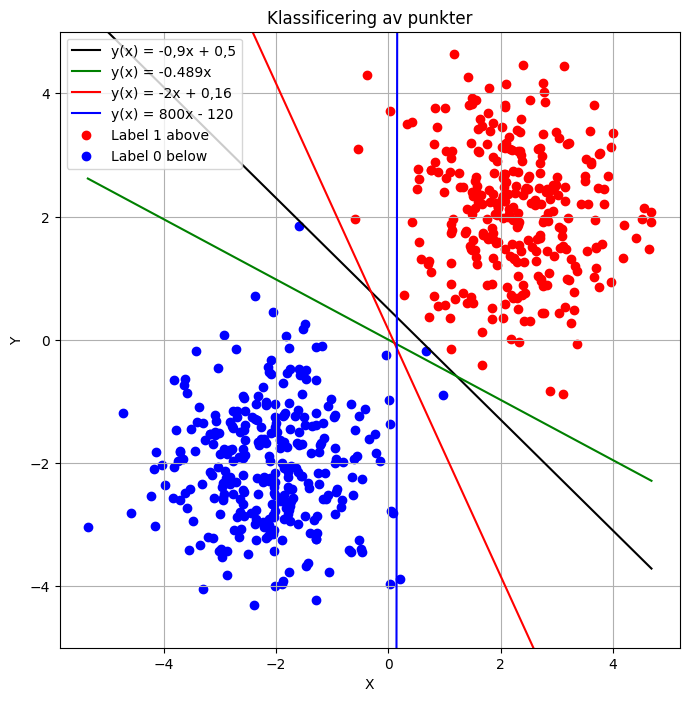

In [26]:
x_line = np.linspace(min(unlabelled[:, 0]), max(unlabelled[:, 0]), 100)
y_line1 = -0.9*x_line + 0.5
y_line2 = -0.489*x_line
y_line3 = -2*x_line + 0.16
y_line4 = 800*x_line - 120
plt.figure(figsize=(8,8), dpi = 100)
plt.title("Klassificering av punkter")
plt.plot (x_line,y_line1, label = 'y(x) = -0,9x + 0,5' , color = "black")
plt.plot (x_line,y_line2, label = 'y(x) = -0.489x' , color = "green")
plt.plot (x_line,y_line3, label = 'y(x) = -2x + 0,16' , color = "red")
plt.plot (x_line,y_line4, label = 'y(x) = 800x - 120' , color = "blue")

plt.scatter(x_above1,y_above1,c="red", label = "Label 1 above ")
plt.scatter(x_below1,y_below1,c="blue", label = "Label 0 below")
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim(-5, 5) 
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Analys och reflektion

Från grafen ovan kan vi se att alla linjer delar upp punkterna nästan jämnt, och skillnaderna mellan dem är relativt små.
Eftersom datapunkterna i laborationen inte hade några fördefinierade etiketter, delades de endast utifrån en jämn fördelning.
Det innebär att det finns oändligt många linjer som skulle kunna användas för att separera punkterna.

Vilken linje som är ”bäst” beror egentligen på vilka kriterier man använder — till exempel hur väl linjen skiljer klasserna åt eller hur balanserad fördelningen blir.

I denna laboration spelar det dock ingen större roll vilken linje som väljs, eftersom syftet främst är att förstå principen för linjär klassificering snarare än att hitta den optimala gränsen.

Att använda en linje för att klassificera datapunkter är en enkel och tydlig metod för binär klassificering.
I praktiken bygger man dock upp klassificeringslinjen utifrån etiketterad data, och använder den sedan för att klassificera nya, okända datapunkter. 